In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Bengkulu.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       358 non-null    float64       
 2   Tx       362 non-null    float64       
 3   Tavg     363 non-null    float64       
 4   RH_avg   363 non-null    float64       
 5   RR       292 non-null    float64       
 6   ss       356 non-null    float64       
 7   ff_x     364 non-null    float64       
 8   ddd_x    363 non-null    float64       
 9   ff_avg   364 non-null    float64       
 10  ddd_car  364 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-2-55ef00b62989>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,19.8,29.8,1.0,23.7
1,2023-02-01,18.8,30.2,12.2,24.1
2,2023-03-01,20.0,29.6,16.0,22.9
3,2023-04-01,20.0,27.9,22.0,23.9
4,2023-05-01,20.4,29.0,NaN,23.7
...,...,...,...,...,...
360,2023-12-16,19.6,31.2,0.0,27.5
361,2023-12-17,20.4,30.2,1.8,26.7
362,2023-12-18,22.0,29.8,8.4,26.0
363,2023-12-19,9999.0,30.6,28.2,26.7


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,19.8,29.8,1.0,23.7
1,31,31,2023-01-02,NaN,29.8,7.4,25.2
2,59,60,2023-01-03,19.0,29.5,0.2,24.2
3,90,92,2023-01-04,21.2,29.6,7.0,24.8
4,120,123,2023-01-05,22.2,31.0,NaN,25.3
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,19.6,31.2,0.0,27.5
350,350,361,2023-12-17,20.4,30.2,1.8,26.7
351,351,362,2023-12-18,22.0,29.8,8.4,26.0
352,352,363,2023-12-19,9999.0,30.6,28.2,26.7


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          6
Tx          3
RR         68
Tavg        2
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

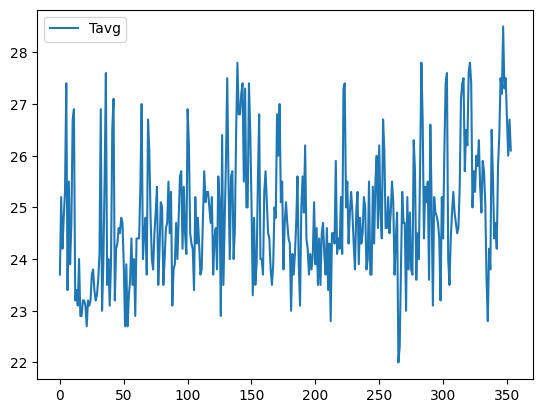

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

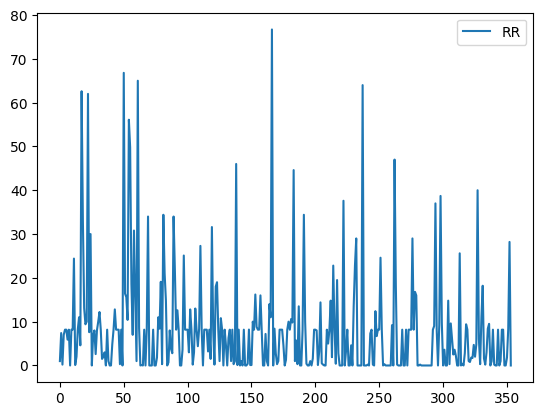

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,19.800000,29.800000,1.000000,23.7,29.800000,25.2,7.400000
1,31,31,2023-01-02,49.372414,29.800000,7.400000,25.2,29.500000,24.2,0.200000
2,59,60,2023-01-03,19.000000,29.500000,0.200000,24.2,29.600000,24.8,7.000000
3,90,92,2023-01-04,21.200000,29.600000,7.000000,24.8,31.000000,25.3,8.173427
4,120,123,2023-01-05,22.200000,31.000000,8.173427,25.3,31.400000,27.4,8.173427
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,19.600000,31.200000,0.000000,27.5,30.200000,26.7,1.800000
350,350,361,2023-12-17,20.400000,30.200000,1.800000,26.7,29.800000,26.0,8.400000
351,351,362,2023-12-18,22.000000,29.800000,8.400000,26.0,30.600000,26.7,28.200000
352,352,363,2023-12-19,9999.000000,30.600000,28.200000,26.7,30.198291,26.1,0.000000


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,1.000000,23.7,25.2,7.400000
1,7.400000,25.2,24.2,0.200000
2,0.200000,24.2,24.8,7.000000
3,7.000000,24.8,25.3,8.173427
4,8.173427,25.3,27.4,8.173427
...,...,...,...,...
349,0.000000,27.5,26.7,1.800000
350,1.800000,26.7,26.0,8.400000
351,8.400000,26.0,26.7,28.200000
352,28.200000,26.7,26.1,0.000000


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,1.000000,23.7,25.2,7.400000
1,7.400000,25.2,24.2,0.200000
2,0.200000,24.2,24.8,7.000000
3,7.000000,24.8,25.3,8.173427
4,8.173427,25.3,27.4,8.173427
...,...,...,...,...
348,0.000000,27.3,27.5,0.000000
349,0.000000,27.5,26.7,1.800000
350,1.800000,26.7,26.0,8.400000
351,8.400000,26.0,26.7,28.200000


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,1.000000,23.7,25.2,7.400000,0
1,7.400000,25.2,24.2,0.200000,1
2,0.200000,24.2,24.8,7.000000,2
3,7.000000,24.8,25.3,8.173427,3
4,8.173427,25.3,27.4,8.173427,4
...,...,...,...,...,...
348,0.000000,27.3,27.5,0.000000,348
349,0.000000,27.5,26.7,1.800000,349
350,1.800000,26.7,26.0,8.400000,350
351,8.400000,26.0,26.7,28.200000,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,25.8
283,283,27.8
284,284,26.7
285,285,24.4
286,286,25.4
...,...,...
348,348,27.3
349,349,27.5
350,350,26.7
351,351,26.0


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([25.16872711, 25.84208471, 25.47322206, 24.70091932, 25.03807684,
       24.93817426, 25.07361174, 24.43578902, 25.44534671, 24.94200403,
       24.27056131, 24.97753893, 24.87763634, 24.85497406, 24.81231121,
       24.71240863, 24.30992598, 24.98328358, 24.71528096, 25.28777854,
       25.72579609, 25.79399355, 24.5846307 , 24.4174881 , 24.72102562,
       24.8900831 , 25.02552057, 24.89199798, 24.82571541, 24.75943284,
       24.79401029, 25.0639278 , 25.63642538, 25.73824285, 25.7728203 ,
       25.16861759, 25.4385351 , 25.33863252, 25.81027008, 25.87846753,
       25.74494494, 24.93902219, 25.17531969, 25.0417971 , 25.2780946 ,
       25.21181203, 25.38086951, 25.07924688, 24.91210428, 25.24926181,
       25.18297923, 24.98221663, 24.47887395, 24.21087132, 24.68250888,
       24.54898629, 25.45768395, 25.15606132, 24.75357867, 24.85539614,
       24.68825354, 25.22713111, 25.4298086 , 25.80058614, 25.70068355,
       26.1387011 , 25.73621845, 25.80441591, 25.53641328, 25.30

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9621407847420285 1.4526227682561252


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,25.8
283,283,27.8
284,284,26.7
285,285,24.4
286,286,25.4
...,...,...
348,348,27.3
349,349,27.5
350,350,26.7
351,351,26.0


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,25.168727
283,25.842085
284,25.473222
285,24.700919
286,25.038077
...,...
348,25.736218
349,25.804416
350,25.536413


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,23.7,NaN
1,25.2,NaN
2,24.2,NaN
3,24.8,NaN
4,25.3,NaN
...,...,...
348,27.3,25.736218
349,27.5,25.804416
350,26.7,25.536413
351,26.0,25.302031


<Axes: >

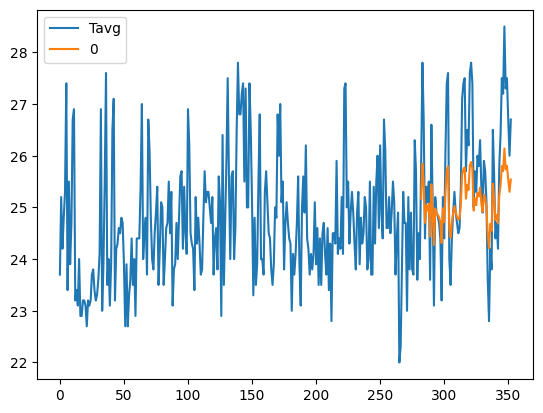

In [27]:
kan.plot()

In [28]:
new_data = [[354, 26.7],[355,26.7],[356,26.7],[357,26.7],[358,26.7],[359,26.7],[360,26.7]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.54024305, 25.5412005 , 25.54215794, 25.54311538, 25.54407283,
       25.54503027, 25.54598771])

In [29]:
kan.to_json('Prediksi Bengkulu.json')